# Explore here

In [28]:
import pandas as pd

total_data = pd.read_csv("/workspaces/TIME-SERIES-FORECASTING/data/raw/sales.csv")
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [29]:
total_data['date'] = pd.to_datetime(total_data['date'])
total_data.set_index('date', inplace=True)

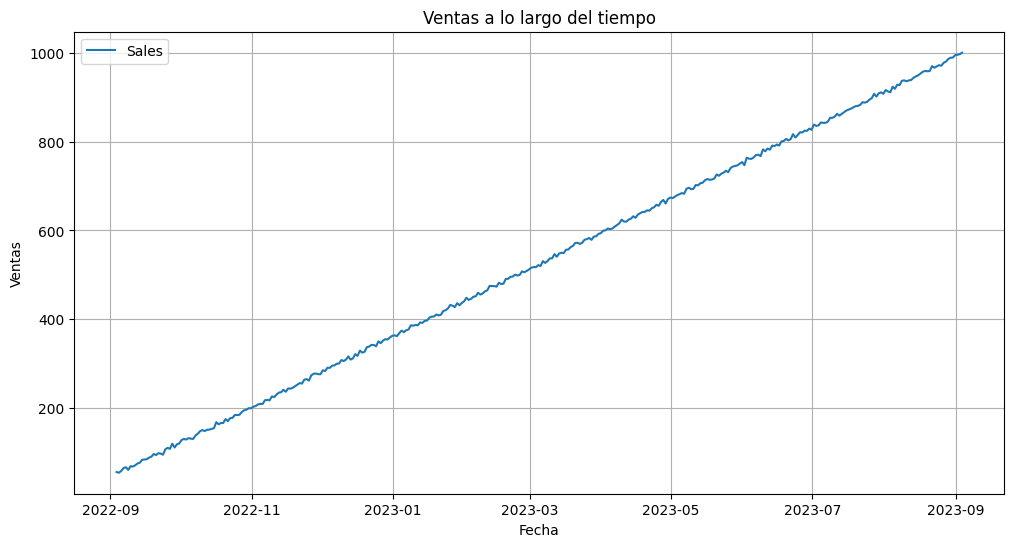

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(total_data['sales'], label='Sales')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
total_data.shape


(366, 1)

### ¿Cuál es el tensor de la serie temporal?

Tiene 366 observaciones de una unica variable (sales)

### ¿Cuál es la tendencia?

En este caso la tendencia es ascendente(creciente)

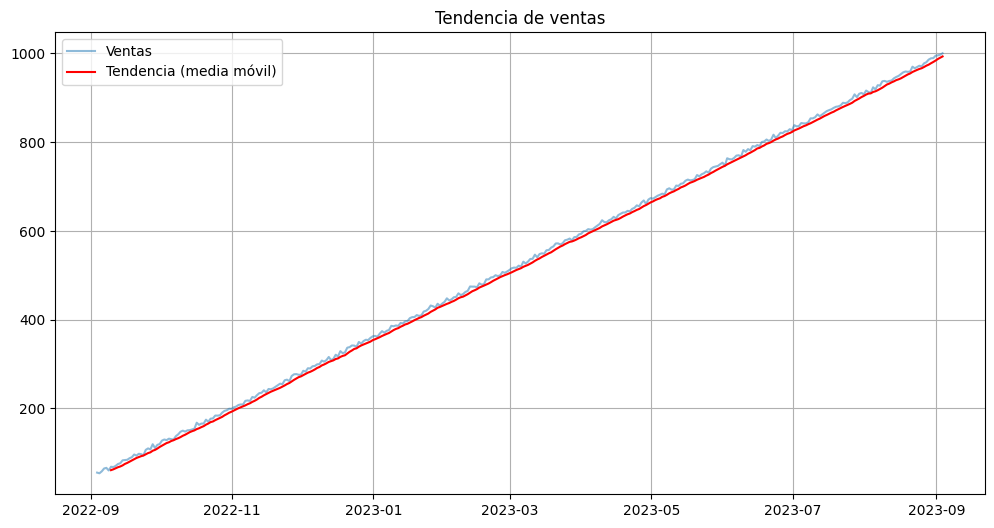

In [32]:
total_data['rolling_mean'] = total_data['sales'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(total_data['sales'], alpha=0.5, label='Ventas')
plt.plot(total_data['rolling_mean'], color='red', label='Tendencia (media móvil)')
plt.legend()
plt.title('Tendencia de ventas')
plt.grid(True)
plt.show()


In [33]:
import pandas as pd

# Cargar los datos desde el archivo CSV
total_data = pd.read_csv("/workspaces/TIME-SERIES-FORECASTING/data/raw/sales.csv")

# Mostrar las primeras filas del DataFrame
print(total_data.head())



                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


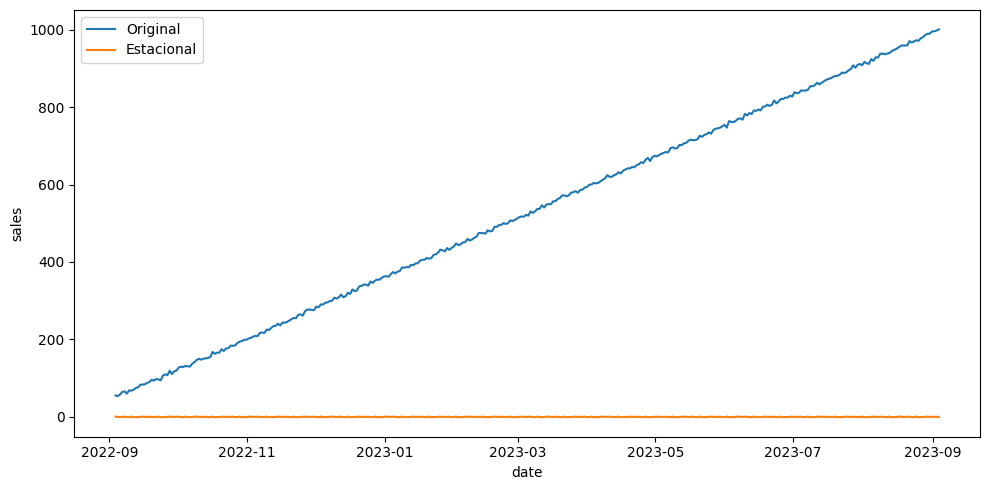

In [34]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que la columna de dates esté en formato datetime y configurada como índice
total_data['date'] = pd.to_datetime(total_data['date'])
total_data.set_index('date', inplace=True)

# Realiza la descomposición estacional
decomposition = seasonal_decompose(total_data['sales'], period=12)

# Extrae los componentes estacionales
seasonal = decomposition.seasonal

# Visualiza los datos originales y la estacionalidad
fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=total_data['sales'], label="Original", ax=axis)
sns.lineplot(data=seasonal, label="Estacional", ax=axis)

plt.tight_layout()
plt.show()


### ¿Es estacionaria?

la serie no es estacionaria (hay tendencia o variabilidad)

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


### ¿Existe variabilidad o presencia de ruido?

	Sí, pero el ruido es aleatorio y no problemático.

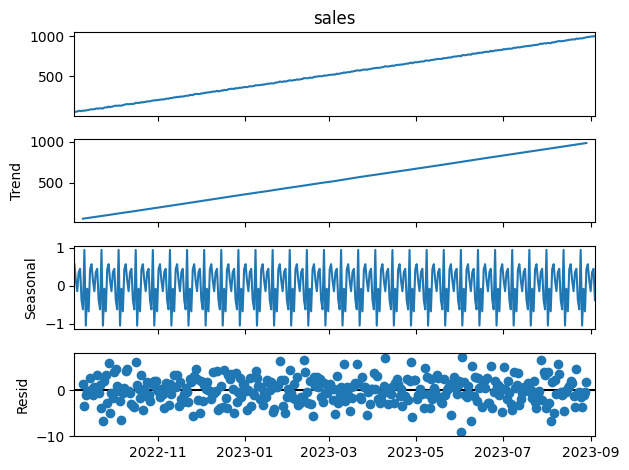

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data['sales'], model='additive', period=12)
decomposition.plot()
plt.show()


In [37]:

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data)
decomposition

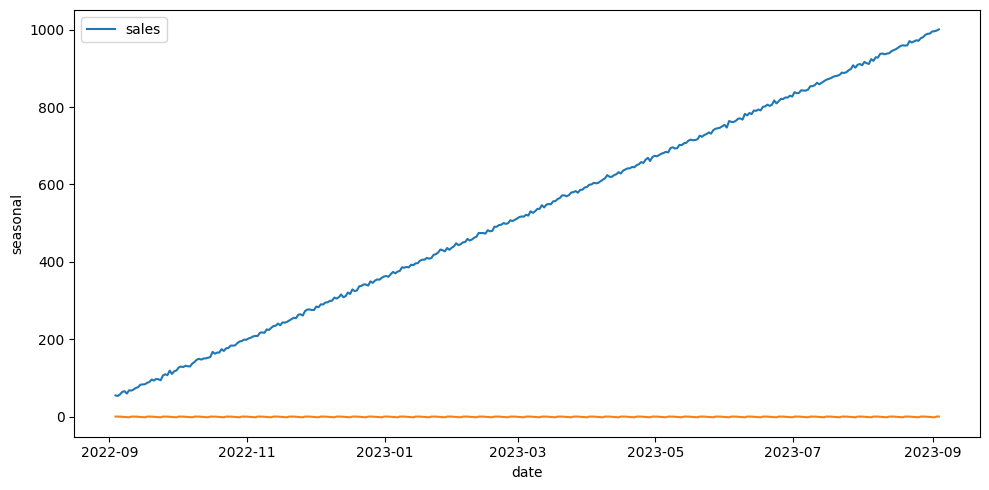

In [39]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [41]:
from statsmodels.tsa.stattools import adfuller

# # Primera diferenciación
# diff_series = total_data['sales'].diff().dropna()

# Test ADF nuevamente
adf_result = adfuller(total_data['sales'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064


In [42]:
train_size = int(len(total_data) * 0.8)
train = total_data['sales'][:train_size]
test = total_data['sales'][train_size:]


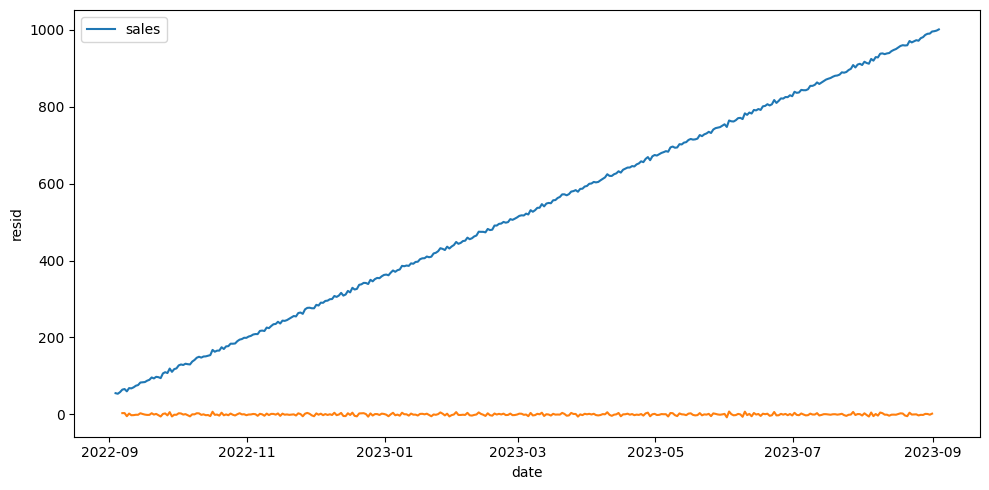

In [43]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

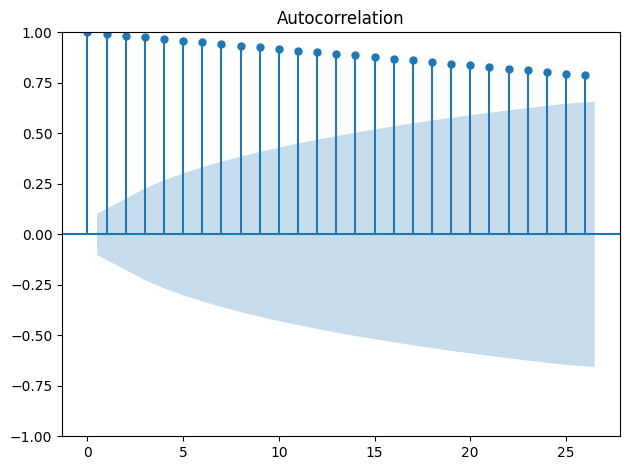

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)

plt.tight_layout()

plt.show()

A medida que avanzamos en la serie temporal, la autocorrelación se pierde regularmente, lo que dificulta la capacidad predictiva del modelo.

In [45]:
from pmdarima import auto_arima

stepwise_model = auto_arima(train,
                             start_p=0, start_q=0,
                             max_p=5, max_q=5,
                             seasonal=False,
                             d=1,  # diferencia de 1
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

print(stepwise_model.summary())


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.15 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.527 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Mon, 14 Apr 2025   AIC                           1475.165
Time:                        16:19:14   BIC                           1486.185
Sample:                             0   HQIC                          1479.579
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


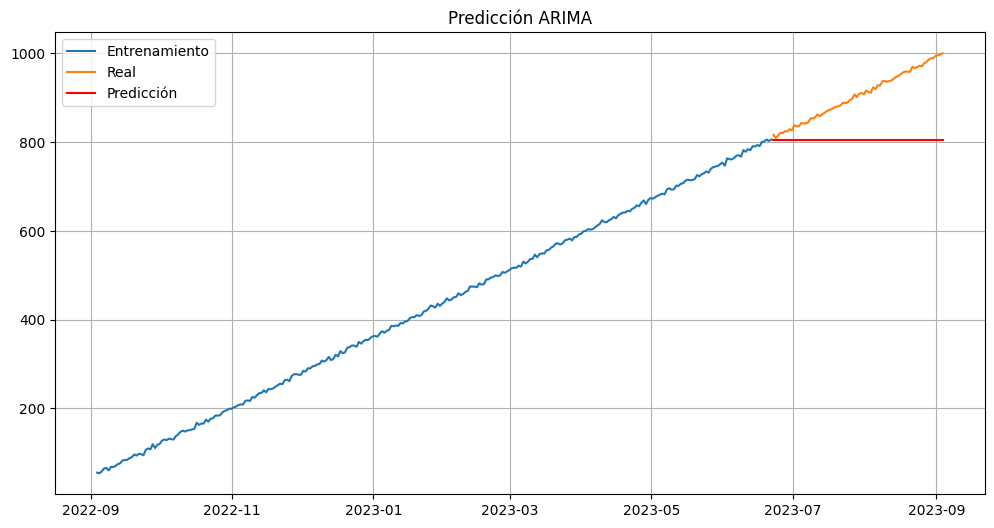

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar el modelo con los parámetros óptimos
model = ARIMA(train, order=(0, 1, 1))
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test))

# Comparar con los datos reales
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train, label='Entrenamiento')
plt.plot(test, label='Real')
plt.plot(test.index, forecast, label='Predicción', color='red')
plt.legend()
plt.title('Predicción ARIMA')
plt.grid(True)
plt.show()


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE
mae = mean_absolute_error(test, forecast)

# RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))

# MAPE
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 98.86
RMSE: 113.38
MAPE: 10.59%
